# Regresion Logistica

In [122]:
#!pip install factor_analyzer

In [123]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

#PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

#Factor Analysis
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

#Encoding
from sklearn.preprocessing import LabelEncoder

In [124]:
wis = pd.read_excel('wisconsin.xlsx')

display(wis.head())
#display(wis.info())
#display(wis.nunique())

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [125]:
varObjCat = wis.diagnosis
id_wis = wis.id
imput_wis = wis.drop(['diagnosis', 'id'], axis=1)

corr = imput_wis.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,-0.312,0.679,-0.097,0.674,0.736,-0.223,0.206,0.194,0.376,-0.104,-0.043,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
texture_mean,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,-0.076,0.276,0.386,0.282,0.260,0.007,0.192,0.143,0.164,0.009,0.054,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
perimeter_mean,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,-0.261,0.692,-0.087,0.693,0.745,-0.203,0.251,0.228,0.407,-0.082,-0.006,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
area_mean,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,-0.283,0.733,-0.066,0.727,0.800,-0.167,0.213,0.208,0.372,-0.072,-0.020,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
smoothness_mean,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,0.585,0.301,0.068,0.296,0.247,0.332,0.319,0.248,0.381,0.201,0.284,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
compactness_mean,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,0.565,0.497,0.046,0.549,0.456,0.135,0.739,0.571,0.642,0.230,0.507,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
concavity_mean,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,0.337,0.632,0.076,0.660,0.617,0.099,0.670,0.691,0.683,0.178,0.449,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
concave points_mean,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,0.167,0.698,0.021,0.711,0.690,0.028,0.490,0.439,0.616,0.095,0.258,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
symmetry_mean,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,0.480,0.303,0.128,0.314,0.224,0.187,0.422,0.343,0.393,0.449,0.332,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438
fractal_dimension_mean,-0.312,-0.076,-0.261,-0.283,0.585,0.565,0.337,0.167,0.480,1.000,0.000,0.164,0.040,-0.090,0.402,0.560,0.447,0.341,0.345,0.688,-0.254,-0.051,-0.205,-0.232,0.505,0.459,0.346,0.175,0.334,0.767


Con los resultados de esta matriz, se comprueba que el dataset es óptimo para realizar un análisis de componentes principales, debida a la gran incidencia de correlaciones altas.

Las variables seguramente se agrupen por valores medidos sobre si mismo, ya que se identifican varios estadísticos realizados sobre distintas medidas o características, como por ejemplo, el área media, su desviación típica y la peor medida tomada sobre ese área y cada una de estas tres medidas se considera una variable dentro de este data set. Adicionalmente, están los casos relacionados que intuitivamente se conoce su correlación sin tener que ver la matriz, como lo son, el área, el radio (componente de la fórmula para sacar el área) y el perímetro (Utiliza fórmula similar a la del área e igualmente utiliza el radio dentro de esta), siendo estos los casos más claros.


In [126]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#importante que la variable objetivo categorica no este en el dataframe sobre el que se producira la prueba
calculate_bartlett_sphericity(imput_wis)

(39362.120841135045, 0.0)

Las conclusiones brindadas previamente se respaldan ahora realizando el test de esferidad, ya que se obtiene un p valor bajo o mejor dicho nulo, lo que indica que la Hipótesis nula H) se descarta y la matriz de correlaciones sobre el dataset de Wisconsin no es parecida a una matriz identidad, lo que equivale a lata frecuencia de correlaciones marcadas entre las variables.

In [127]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(imput_wis)

C:\Users\guill\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



(array([0.83463512, 0.64352613, 0.85334054, 0.86403253, 0.814716  ,
        0.87939755, 0.89192843, 0.90027723, 0.82510264, 0.83181381,
        0.83412178, 0.48458942, 0.84290718, 0.85199881, 0.64427854,
        0.8712978 , 0.82547994, 0.83516673, 0.5832182 , 0.81149623,
        0.82308704, 0.60329755, 0.88493799, 0.82044529, 0.75316064,
        0.85127714, 0.90222587, 0.89105242, 0.69074764, 0.81233969]),
 0.8322253094651043)

Teniendo en cuenta el criterio de los índices para este test KMO, el modelo en general es bueno debido a su alto coeficiente (0.83) y solamente se cuenta con una variable cuyo índice es bajo, por ende, inaceptable, ya que obtiene un valor de 0.48. Esta variable es la desviación típica de la textura, la cual parece tener sentido que sea la variable con menor correlación con el conjunto de datos.
Por lo demás, se obtienen valores muy buenos en los índices de las variables, así que el estudio esta bien encaminado.


Siendo la variable objetivo de tipo categórica y en este caso, dicotómica, se conoce entonces que el modelo adecuado será de regresión logística para prever cuando se obtendrán diagnósticos de cualquier tipo.

Los problemas que puede brindar las correlaciones observadas, pueden ser, la gran cantidad de variables y algunas que explican características iguales y la falta de correlación entre las variables de desviación típica con sus pares y otras variables como la textura que no cuentan con un grado alto de correlación, pudiendo así afectar la reducción de variables del modelo ya que será difícil agruparlas. Pero por lo demás no parece haber muchos problemas tras las pruebas realizadas.


### Escalado de datos

In [128]:
scaler = StandardScaler()
scaler.fit(imput_wis)

StandardScaler()

In [129]:
X = scaler.transform(imput_wis)

## PCA para reducir dimensionalidad 

In [130]:
pca = PCA(n_components=0.7)
scores = pca.fit_transform(X)
scores_pd = pd.DataFrame({'Componente1':scores[:, 0], 'Componente2':scores[:, 1], 'Componente3':scores[:, 2]})
scores_pd.head()

,Componente1,Componente2,Componente3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767


In [131]:
#!pip install psynlig

(<Figure size 748.8x514.8 with 1 Axes>,
 <AxesSubplot:xlabel='Principal component', ylabel='Eigenvalue'>)

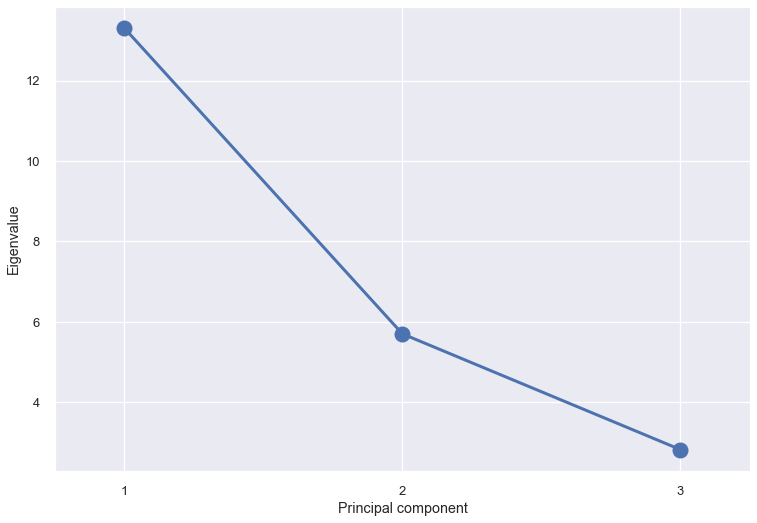

In [132]:
from psynlig import pca_scree
plt.style.use('seaborn-talk')

pca_scree(pca, marker='o', markersize=16, lw=3)

Para obtener o cubrir el 70% de la varianza de los datos, se necesitan únicamente 3 componentes, lo cual supone una gran reducción de los datos.

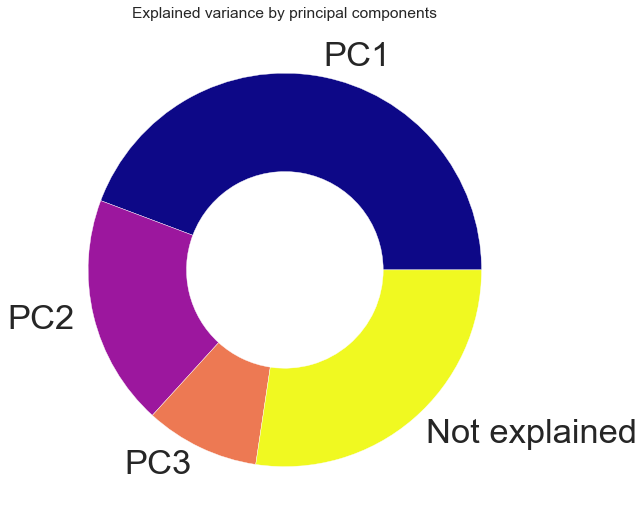

In [133]:
from psynlig import pca_explained_variance_pie
plt.style.use('seaborn-talk')

fig, axi = pca_explained_variance_pie(pca, cmap='plasma')
axi.set_title('Explained variance by principal components')

plt.show()

In [134]:
fig = px.bar(x=['Componente1', 'Componente2', 'Componente3'], y=pca.explained_variance_ratio_, 
             title='Porcentaje de Variabilidad Explicada por Componente'  )
fig.update_xaxes(title_text="Componentes")
fig.update_yaxes(title_text="Variabilidad")

fig.show()

Con esto vemos más a fondo el porcentaje de varianza que explica cada componente, siendo para el componente 1 un 44.27%, para el 2 un 18.97% y para el tres un 9.39%. Esta componente tres no contribuye mucho en la variabilidad explicada, pero a fin de llegar al 70 % de variabilidad total se mantendrá en consideración.

([<Figure size 748.8x514.8 with 1 Axes>],
 [<AxesSubplot:title={'center':'Loading coefficients for PC1'}, xlabel='Variables', ylabel='Coefficient'>])

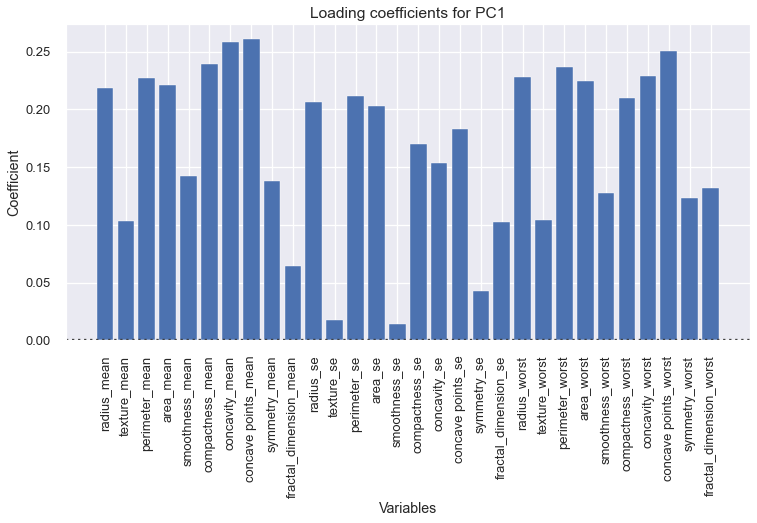

In [135]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from psynlig import (
    pca_explained_variance,
    pca_residual_variance,
    pca_explained_variance_bar,
    pca_explained_variance_pie,
    pca_1d_loadings,
    pca_2d_loadings,
    pca_2d_scores
)
pca_1d_loadings(
        pca,
        imput_wis.columns,
        select_components={1},
        plot_type='bar',
    )

([<Figure size 748.8x514.8 with 1 Axes>],
 [<AxesSubplot:title={'center':'Loading coefficients for PC2'}, xlabel='Variables', ylabel='Coefficient'>])

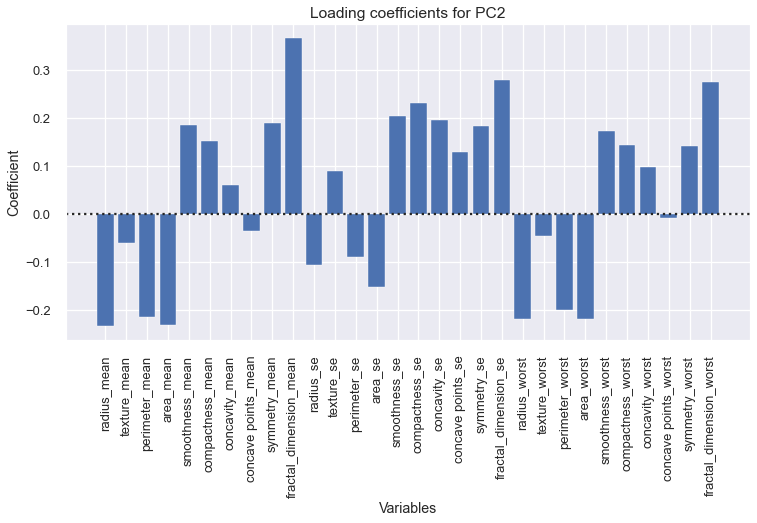

In [136]:
pca_1d_loadings(
        pca,
        imput_wis.columns,
        select_components={2},
        plot_type='bar',
    )

([<Figure size 748.8x514.8 with 1 Axes>],
 [<AxesSubplot:title={'center':'Loading coefficients for PC3'}, xlabel='Variables', ylabel='Coefficient'>])

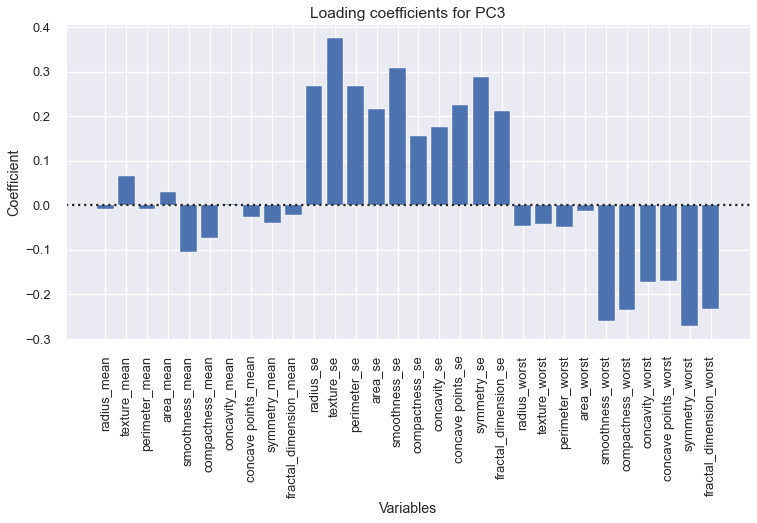

In [137]:
pca_1d_loadings(
        pca,
        imput_wis.columns,
        select_components={3},
        plot_type='bar',
    )

La componente uno se centra principalmente los valores medios y "peores" de las medidas del tumor como lo son el radio, perímetro, concavidad, que describen principalmente forma y tamaño del tumor, y serán estas variables las que ms aporten al valor de esta componente. No obstante, todas las variables al ser positivas también sumaran al valor de la componente 1.

La componente 2 penaliza el tamaño del tumor ya que las variables referentes a el cálculo del tamaño (perímetro, área, radio) son negativas, lo que quiere decir que valores grandes de estas solo contribuyen a que el valor de la componente sea pequeño. En este caso la componente dos trata más sobre la forma y simetría del tumor.

La última componente (3) se basa en las desviaciones típicas de las medidas de tamaño y forma del tumor, por lo que se valora la diferencia de medidas con respecto a la media, y se ve penalizada por los valores extremos en la forma del tumor ya que las variables que describen esta son negativas (suavidad, concavidad, etc)


In [138]:
#biplot(scores[:,0:2],np.transpose(pca.components_[0:2, :]),imput_wis.columns)
#plt.show()

In [139]:
imput_componentes = pd.concat([id_wis,varObjCat, scores_pd], axis=1)
scores_pd.head()
display(imput_componentes.head())
display(imput_componentes.info())

,id,diagnosis,Componente1,Componente2,Componente3
0,842302,M,9.192837,1.948583,-1.123166
1,842517,M,2.387802,-3.768172,-0.529293
2,84300903,M,5.733896,-1.075174,-0.551748
3,84348301,M,7.122953,10.275589,-3.232790
4,84358402,M,3.935302,-1.948072,1.389767


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnosis    569 non-null    object 
 2   Componente1  569 non-null    float64
 3   Componente2  569 non-null    float64
 4   Componente3  569 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 22.4+ KB


None

In [140]:
varObjCat.replace(['M', 'B'], [1, 0], inplace=True)
varObjCat.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

### Particion Training Test

In [141]:
X_train, X_test, y_train, y_test = train_test_split(scores_pd, varObjCat, test_size=0.2, random_state=1354)

# Comprobamos dimensiones
print('Training dataset shape:', X_train.shape, y_train.shape)

Training dataset shape: (455, 3) (455,)


In [142]:
data_train = X_train.join(y_train)

formC=ols_formula(data_train,'diagnosis')
formC

'diagnosis ~ Componente1 + Componente2 + Componente3'

In [143]:
from statsmodels.formula.api import logit 

# Ajusto regresión de ejemplo
modeloCompleto = logit(formC,data=data_train).fit()

modeloCompleto.summary()

Optimization terminated successfully.
         Current function value: 0.103624
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.8426
Time:                        21:50:51   Log-Likelihood:                -47.149
converged:                       True   LL-Null:                       -299.64
Covariance Type:            nonrobust   LLR p-value:                3.980e-109
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5935      0.275     -2.161      0.031      -1.132      -0.055
Componente1     2.5476      0.392      6.492      0.000       1.778       3.317
Componente2    -1.3682      0.259     -5.276      0.000      -1.876      -0.860
Componente3    -0.4670      0.161     -2.906      0.004      -0.782      -0.152
===============================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Se observa que la bondad de ajuste es alta, ya que el valor arrojado sobre el Pseudo R2 es de un %84.26 porciento, además, el valor de las componentes no se rechaza, por lo que contribuyen al modelo.

Si embargo, hay que tener en cuenta el mensaje que arroja al final el modelo completo, indicando que puede existir una separación completa, es decir, que para ciertos valores de la variable independiente, todas las observaciones tienen el mismo valor para la variable dependiente, pudiendo causar que el modelo no pueda proporcionar una buena predicción para la variable dependiente.


In [144]:
form_comp12=ols_formula(data_train,'diagnosis', 'Componente3')
form_comp12
modelo_comp12 = logit(form_comp12,data=data_train).fit()

modelo_comp12.summary()

Optimization terminated successfully.
         Current function value: 0.113539
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.8276
Time:                        21:50:51   Log-Likelihood:                -51.660
converged:                       True   LL-Null:                       -299.64
Covariance Type:            nonrobust   LLR p-value:                2.017e-108
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.3553      0.252     -1.409      0.159      -0.849       0.139
Componente1     2.3521      0.332      7.076      0.000       1.701       3.004
Componente2    -1.2430      0.226     -5.497      0.000      -1.686      -0.800
===============================================================================

Possibly complete quasi-separation: A fraction 0.28 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Dejando un modelo con solamente la componente dos y tres se obtiene el mismo warning sobre la separación perfecta, pero a menor porcentaje.

El valor de PSeudo R2 disminuye en un 2%, por lo que la componente 3 podría quedarse por fuera fácilmente.


In [145]:
form_comp1=ols_formula(data_train,'diagnosis', 'Componente2', 'Componente3')
form_comp1

'diagnosis ~ Componente1'

In [146]:
modelo_comp1 = logit(form_comp1,data=data_train).fit()

modelo_comp1.summary()

Optimization terminated successfully.
         Current function value: 0.196224
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      453
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.7020
Time:                        21:50:51   Log-Likelihood:                -89.282
converged:                       True   LL-Null:                       -299.64
Covariance Type:            nonrobust   LLR p-value:                 1.708e-93
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5481      0.196     -2.795      0.005      -0.932      -0.164
Componente1     1.3240      0.134      9.857      0.000       1.061       1.587
===============================================================================
"""

Comprobando esta vez el modelo únicamente con la componente 1, ya no se obtiene el mensaje preventivo sobre posible separación perfecta, pero el valor de la varianza explicada estimada disminuye fuertemente en mas de el 10%, aun así, el valor sigue siendo alto al ser un 70%.

In [147]:
list_form = [formC,form_comp12, form_comp1]

list_res = pd.DataFrame(map(lambda x: cross_val_log(x,imput_componentes, seed=2023),list_form))

Modelo: diagnosis ~ Componente1 + Componente2 + Componente3
AUC: 0.990 (0.006)
Modelo: diagnosis ~ Componente1 + Componente2
AUC: 0.990 (0.006)
Modelo: diagnosis ~ Componente1
AUC: 0.970 (0.013)


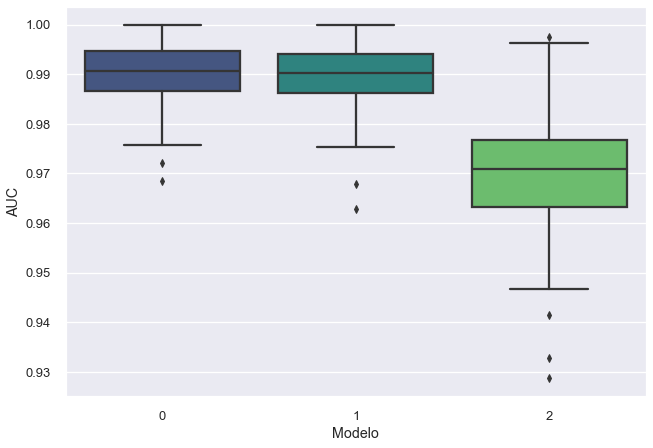

In [148]:
results = list_res.T.melt()
results.columns = ['Modelo','AUC']
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()

Una vez realizada la validación cruzada no queda mas remedio que elegir el modelo con los 3 componentes ya que los resultados que arroja son mucho mejores.

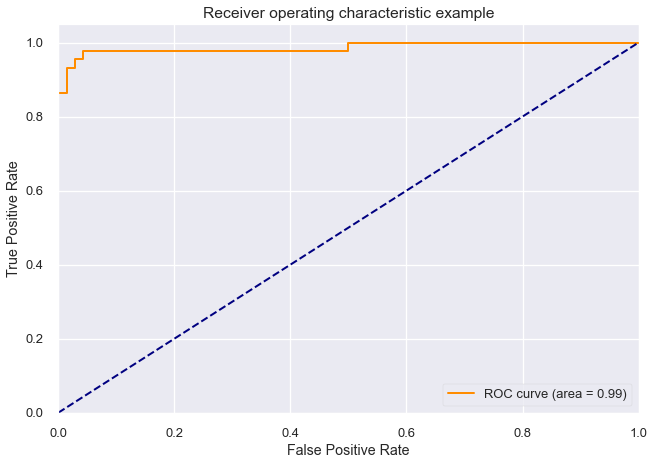

In [149]:
y_pred = modeloCompleto.predict(X_test)

roc_grafico(y_test,y_pred)

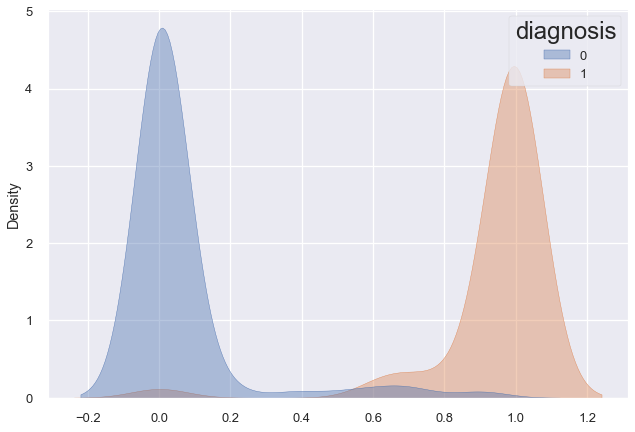

In [150]:
y_pred = modeloCompleto.predict(X_test)

#sns.histplot(x=y_pred, hue=y_test)
#px.histogram(x=y_pred, color=y_test).show()
#gráfico de las probabilidades obtenidas
plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()

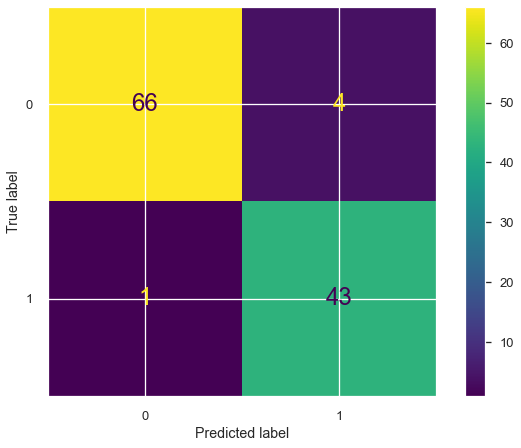

In [151]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modeloCompleto.predict(X_test)
cm = confusion_matrix(y_test, round(y_pred))

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display

El mejor modelo Otorga valores prometedores, ya que solo se arrojan 4 falsos positivos de 70 y un falso negativo de 44, valores casi perfectos para predecir el tipo de diagnosis.

In [152]:
modeloCompleto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  455
Model:                          Logit   Df Residuals:                      451
Method:                           MLE   Df Model:                            3
Date:                Wed, 15 Mar 2023   Pseudo R-squ.:                  0.8426
Time:                        21:50:54   Log-Likelihood:                -47.149
converged:                       True   LL-Null:                       -299.64
Covariance Type:            nonrobust   LLR p-value:                3.980e-109
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5935      0.275     -2.161      0.031      -1.132      -0.055
Componente1     2.5476      0.392      6.492      0.000       1.778       3.317
Componente2    -1.3682      0.259     -5.276      0.000      -1.876      -0.860
Componente3    -0.4670      0.161     -2.906      0.004      -0.782      -0.152
===============================================================================

Possibly complete quasi-separation: A fraction 0.35 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [153]:
np.exp(modeloCompleto.params)

Intercept       0.552370
Componente1    12.776257
Componente2     0.254571
Componente3     0.626856
dtype: float64

La componente 1 según el modelo de regresión logística elegido, en este caso, el de las tres componentes, influye drásticamente en la probabilidad de que el tumor sea maligno (1), específicamente es 12.78 veces más probable que el tumor sea maligno por cada aumento unitario de la componente 1. Esto quiere decir, asumiendo que la componente uno se centra en el tamaño del tumor, que entre más grande sea este, es más probable que sea, maligno.